In [1]:
import pandas as pd
import numpy as np

from datetime import datetime


import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.dates import date2num

import corona_variants_bw_helper as cvh
#import camelot

# Read and Prepare Data

In [2]:
data = pd.read_csv("./data/data_corona_varianten.tsv",
            infer_datetime_format=True,
            delimiter="\t")

In [3]:
data.keys()

Index(['Timestamp', 'Dayname', '0-9', '10-19', '20-29', '30-39', '40-49',
       '50-59', '60-69', '70-79', '80-89', '90', 'Faelle', 'nLKs',
       'Faelle_Varianten_Typ', 'B117', 'B1351', 'B11281',
       'nAusbrueche_KW53_2020', 'nAusbrueche_KW53_2020_Varinten',
       'n_Ausbrueche_Pflegeheimen', 'nAusbrueche_Pflefeheimen_Varianten',
       'n_Ausbrueche_Schulen', 'n_Ausbrueche_Schulen_Varianten',
       'n_Ausbrueche_Kitas', 'n_Ausbrueche_Kitas_Varianten',
       'n_neue_Fälle_ges', 'n_ges'],
      dtype='object')

In [4]:
age_groups = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90"]

In [5]:
# add a column containing the sum on that day
data['sum_agegroups']=data[age_groups].sum(axis=1)

In [6]:
data["Timestamp"] = pd.to_datetime(data.Timestamp, format="%d.%m.%y %H:%M")

In [7]:
#data

In [8]:
data[["Timestamp", "Faelle", "sum_agegroups"]]

,Timestamp,Faelle,sum_agegroups
0,2021-02-08 16:00:00,1081,1081
1,2021-02-09 16:00:00,1246,1246
2,2021-02-10 16:00:00,1232,1232
3,2021-02-11 16:00:00,1371,1370
4,2021-02-12 16:00:00,1576,1575
5,2021-02-13 16:00:00,1748,1747
6,2021-02-14 16:00:00,1810,1809
7,2021-02-15 16:00:00,1933,1932
8,2021-02-16 16:00:00,2065,2065
9,2021-02-17 16:00:00,2250,2250


In [9]:
Y_MAX = data[age_groups].max().max()
print(Y_MAX)

3751


increment of data

In [10]:
data = data.drop('Dayname', 1)

In [11]:
Δdata = data.diff()
# if all increments of time are one day then replace with original dates (not increments)
Δdata["Timestamp"] = data["Timestamp"]

In [12]:
Δdata

,Timestamp,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,...,nAusbrueche_KW53_2020_Varinten,n_Ausbrueche_Pflegeheimen,nAusbrueche_Pflefeheimen_Varianten,n_Ausbrueche_Schulen,n_Ausbrueche_Schulen_Varianten,n_Ausbrueche_Kitas,n_Ausbrueche_Kitas_Varianten,n_neue_Fälle_ges,n_ges,sum_agegroups
0,2021-02-08 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-09 16:00:00,5.0,11.0,27.0,27.0,25.0,34.0,21.0,7.0,4.0,...,77.0,2.0,11.0,0.0,2.0,2.0,3.0,622.0,1013.0,165.0
2,2021-02-10 16:00:00,5.0,10.0,13.0,-4.0,7.0,-8.0,-8.0,-7.0,-15.0,...,4.0,-6.0,-27.0,2.0,12.0,-1.0,-2.0,215.0,1228.0,-14.0
3,2021-02-11 16:00:00,5.0,14.0,21.0,21.0,30.0,26.0,7.0,10.0,4.0,...,72.0,1.0,5.0,0.0,16.0,0.0,0.0,-305.0,923.0,138.0
4,2021-02-12 16:00:00,10.0,27.0,29.0,30.0,38.0,50.0,13.0,3.0,4.0,...,65.0,1.0,2.0,0.0,1.0,0.0,0.0,-103.0,820.0,205.0
5,2021-02-13 16:00:00,7.0,17.0,25.0,25.0,25.0,39.0,12.0,10.0,10.0,...,48.0,2.0,12.0,0.0,0.0,0.0,1.0,-41.0,779.0,172.0
6,2021-02-14 16:00:00,4.0,7.0,13.0,14.0,4.0,9.0,10.0,0.0,0.0,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,-408.0,371.0,62.0
7,2021-02-15 16:00:00,3.0,10.0,24.0,20.0,22.0,15.0,12.0,10.0,5.0,...,38.0,0.0,3.0,0.0,0.0,1.0,1.0,-149.0,222.0,123.0
8,2021-02-16 16:00:00,6.0,13.0,14.0,19.0,29.0,26.0,12.0,4.0,10.0,...,79.0,1.0,4.0,1.0,7.0,1.0,2.0,546.0,768.0,133.0
9,2021-02-17 16:00:00,7.0,17.0,26.0,32.0,32.0,34.0,17.0,5.0,6.0,...,74.0,0.0,15.0,0.0,0.0,0.0,0.0,145.0,913.0,185.0


# Plotting

## for each timestep

0


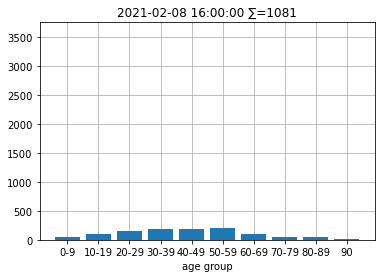

1


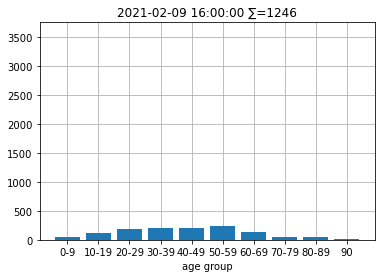

2


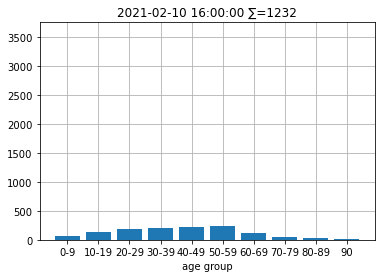

3


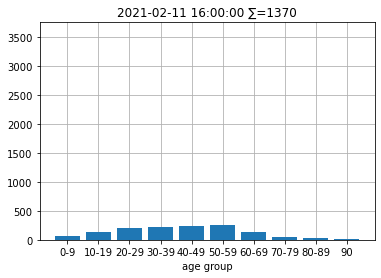

4


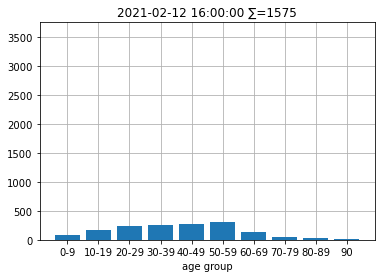

5


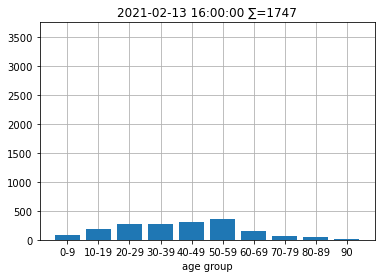

6


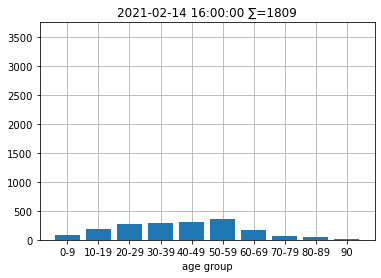

7


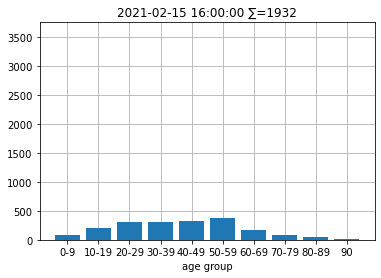

8


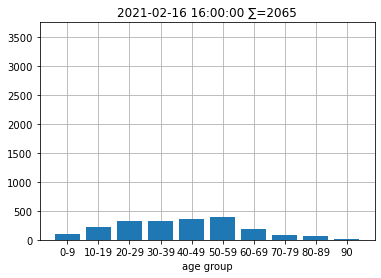

9


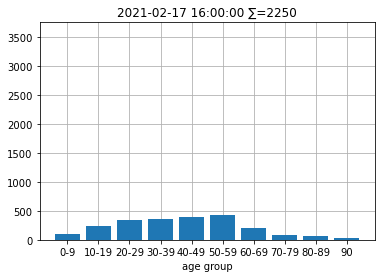

10


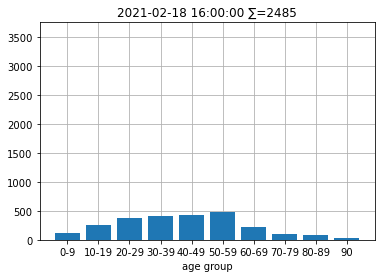

11


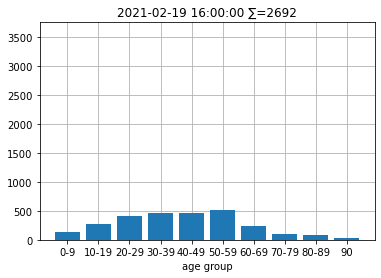

12


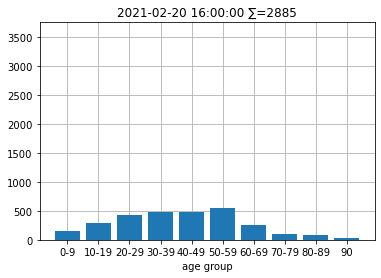

13


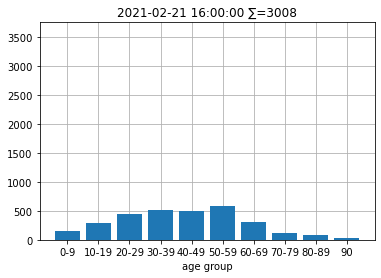

14


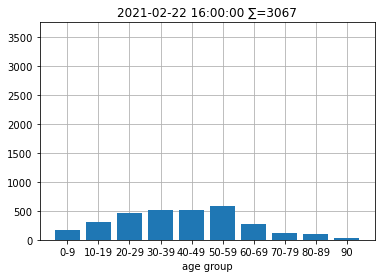

15


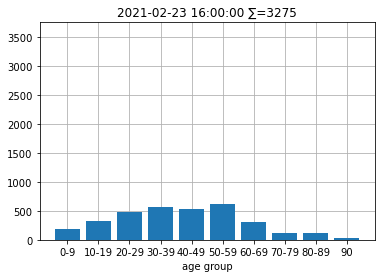

16


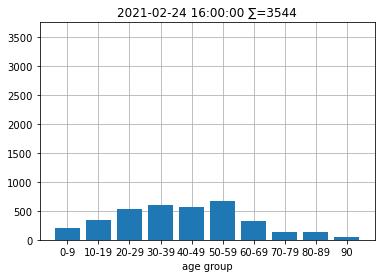

17


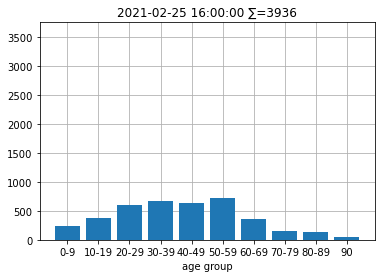

18


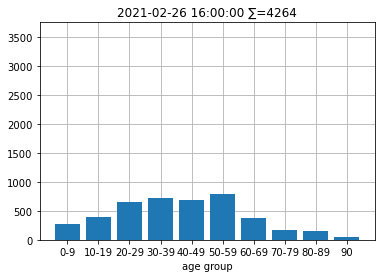

19


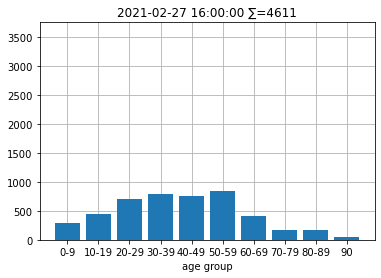

20


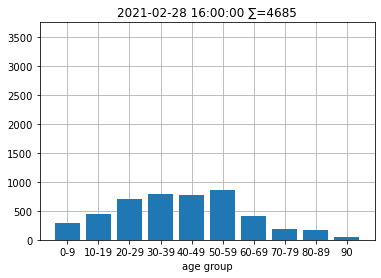

21


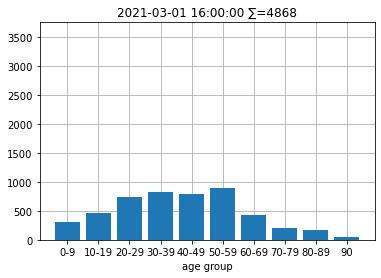

22


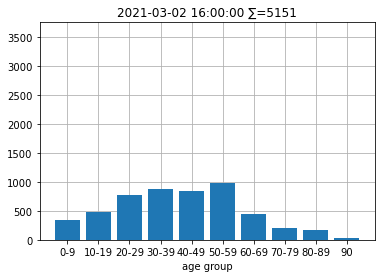

23


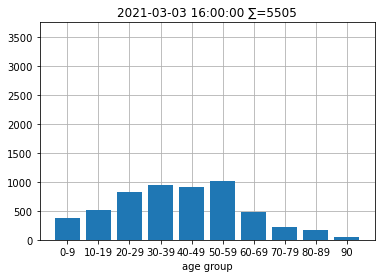

24


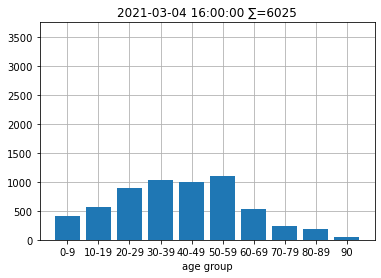

25


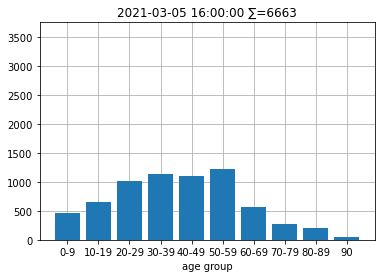

26


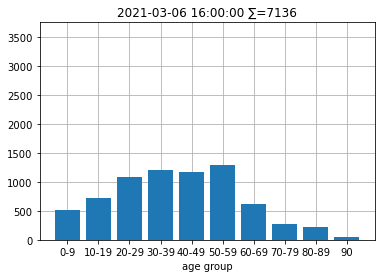

27


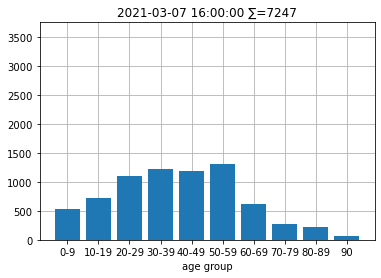

28


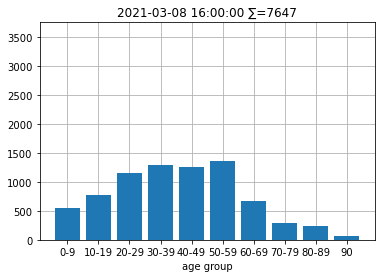

29


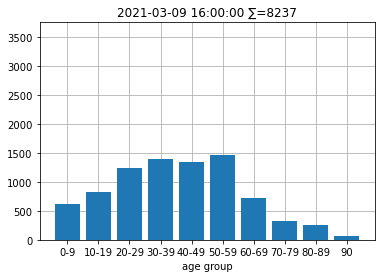

30


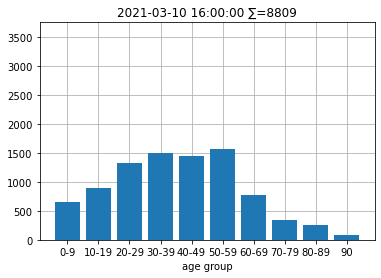

31


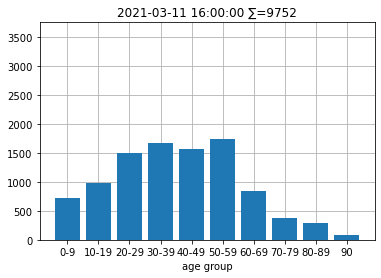

32


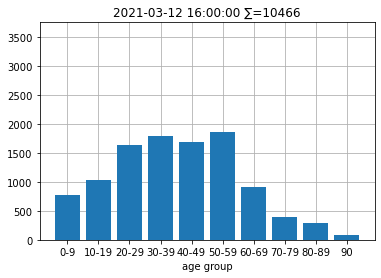

33


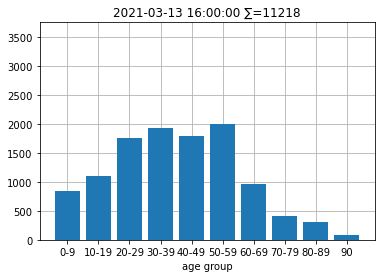

34


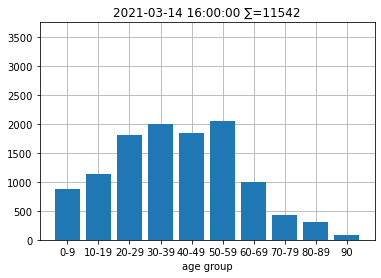

35


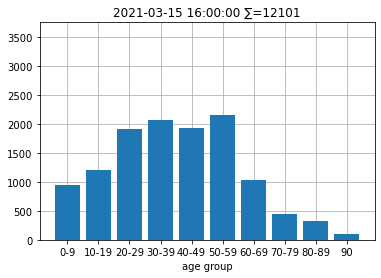

36


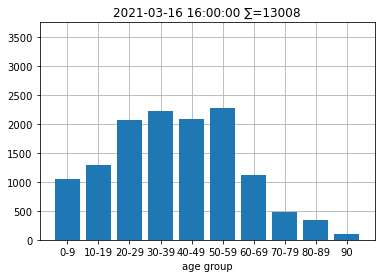

37


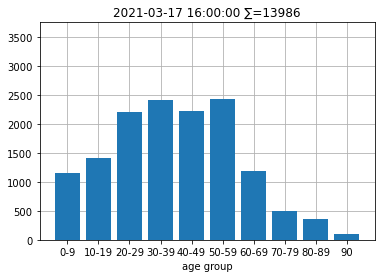

38


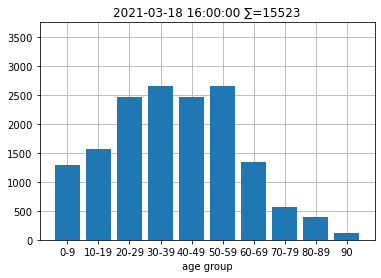

39


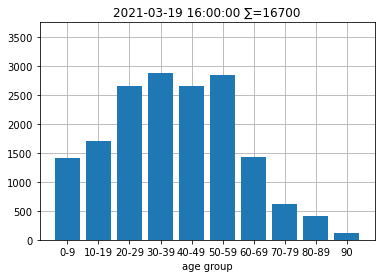

40


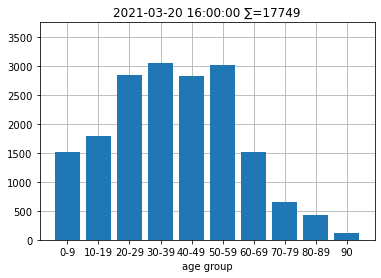

41


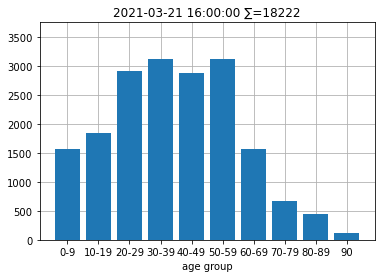

42


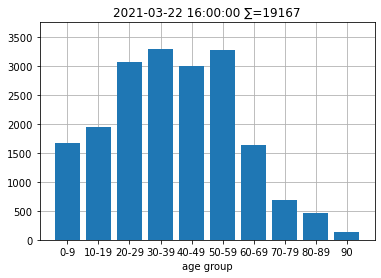

43


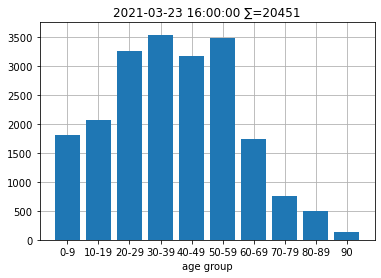

44


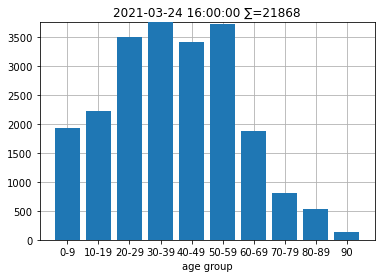

In [13]:
for i in range(data.index[-1]+1):
    print(i)
    cur_height = np.array(data.loc[i][age_groups])
    plt.bar(age_groups, 
            height=cur_height,
           zorder=999)
    plt.grid(True)
    plt.xlabel('age group')
    plt.ylim(0.,Y_MAX)
    plt.title(str(data.loc[i][0]) + f" ∑={data['sum_agegroups'][i]}")
    plt.show()
    plt.close()

Plot des Zuwachses

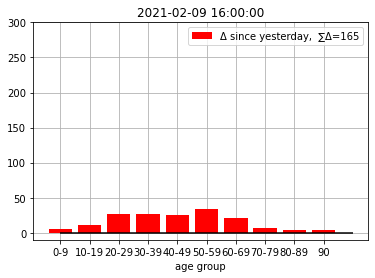

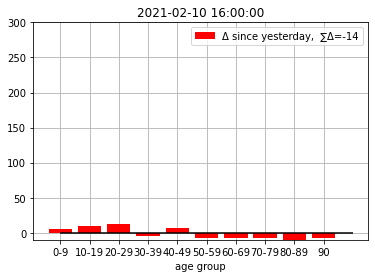

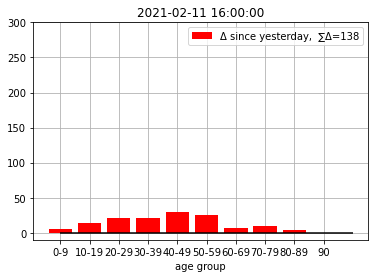

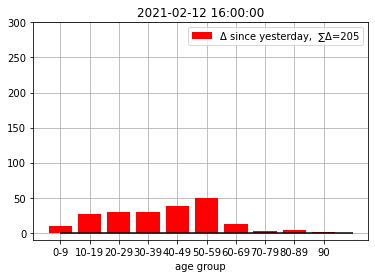

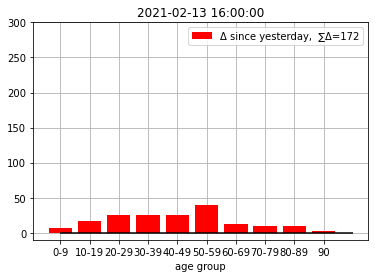

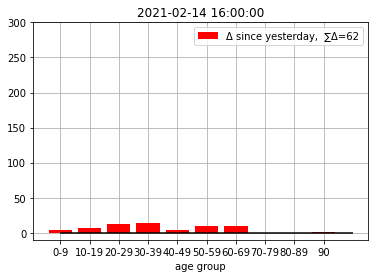

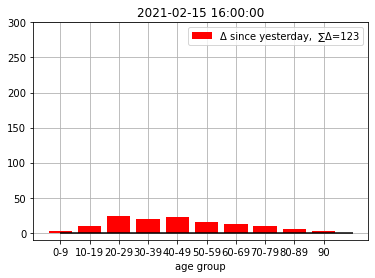

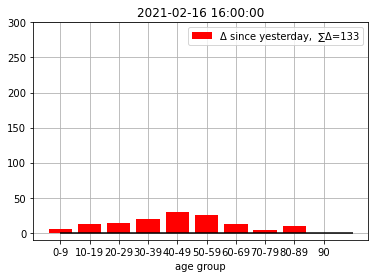

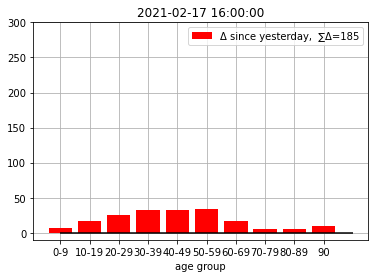

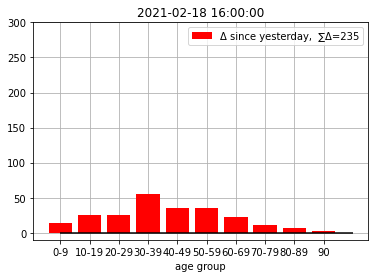

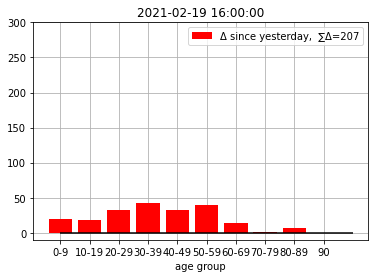

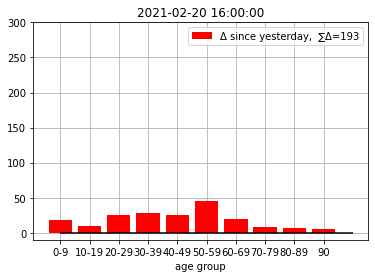

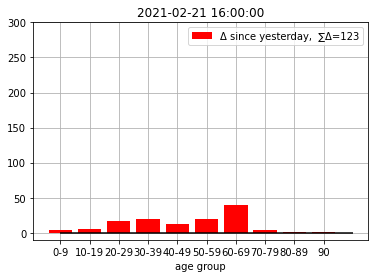

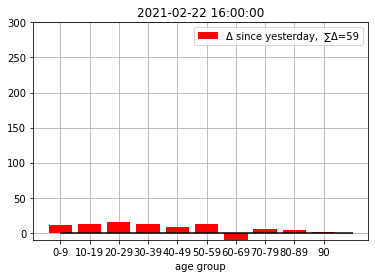

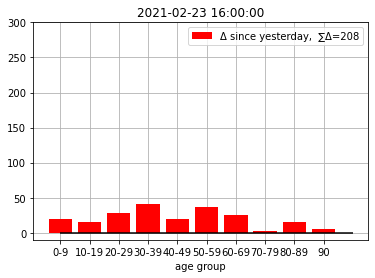

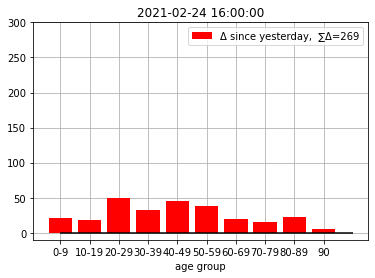

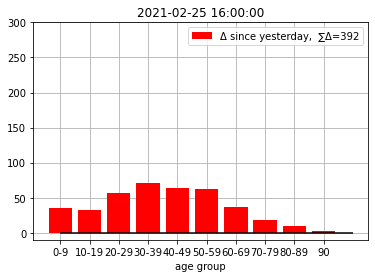

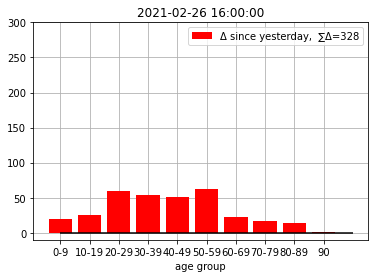

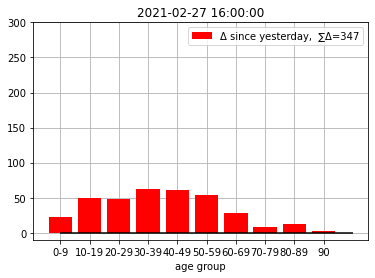

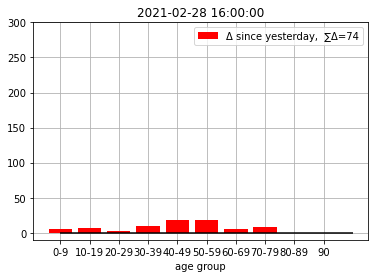

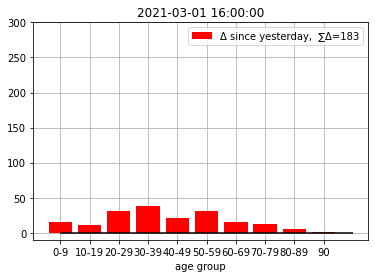

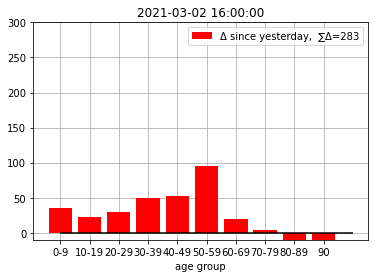

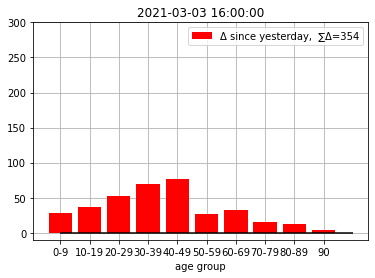

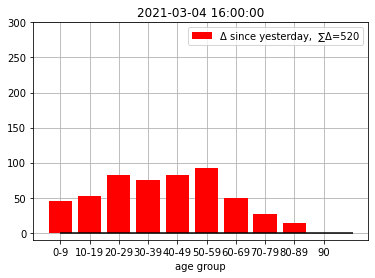

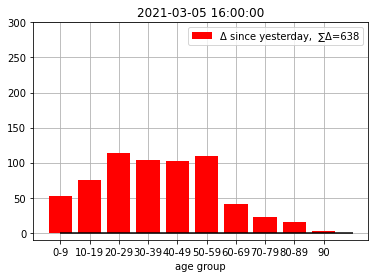

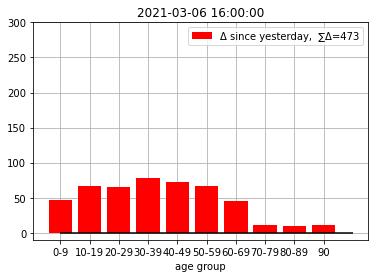

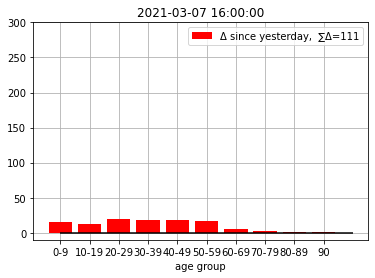

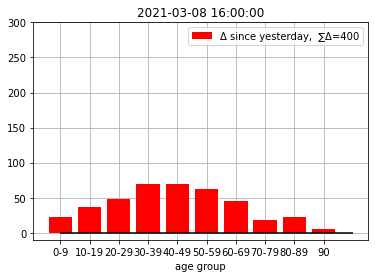

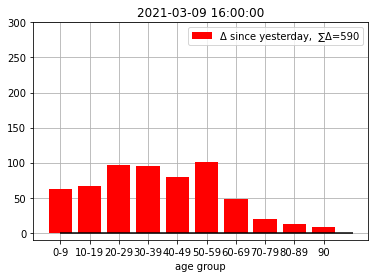

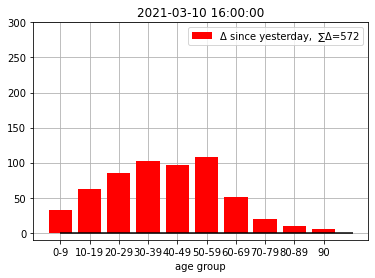

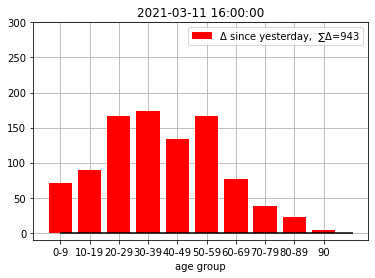

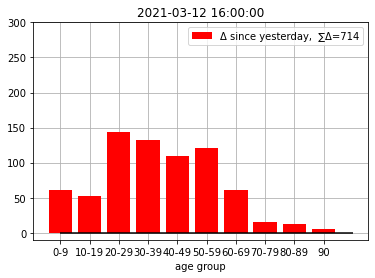

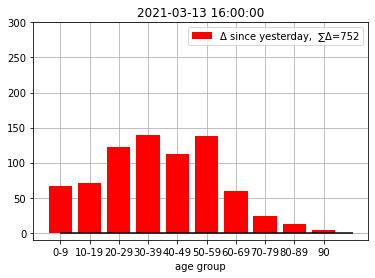

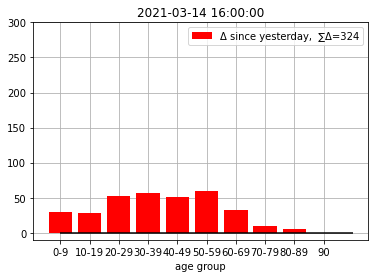

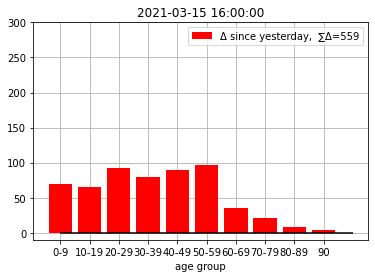

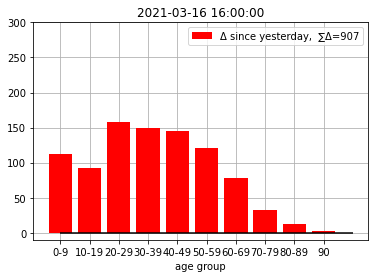

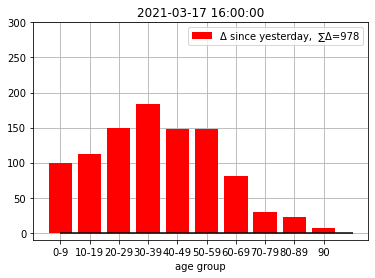

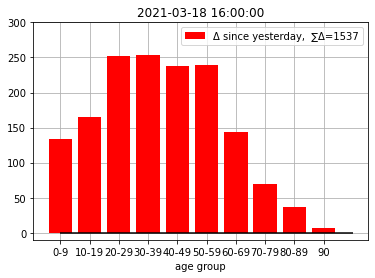

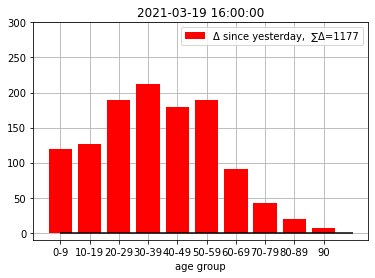

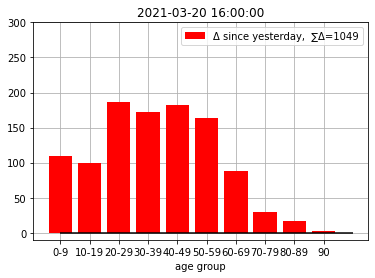

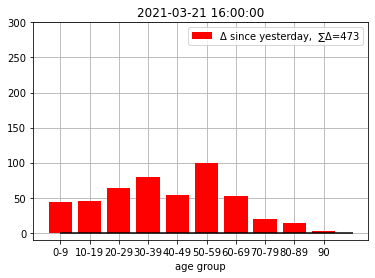

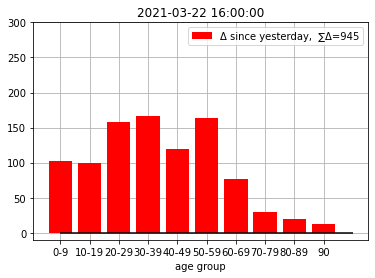

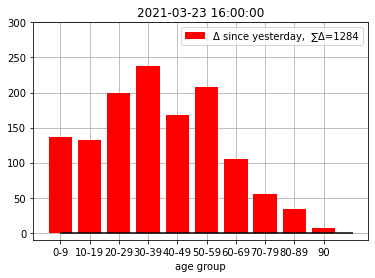

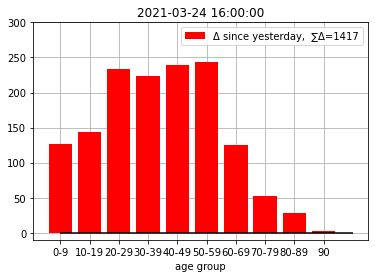

In [14]:
for i in np.arange(start=1, stop=data.index[-1]+1):
    # print(i)
    cur_height = np.array(data.loc[i][age_groups])
    # print(cur_height)
    prev_height = np.array(data.loc[i-1][age_groups])
    # print(prev_height)
    Δ = cur_height - prev_height
    # print(bottom)
    sum_delta = Δ.sum()

    
    # plot current height
#     plt.bar(age_groups, 
#             height=cur_height,
#            zorder=995)
    # plot change since last time
    plt.bar(age_groups, 
            height=Δ,
            bottom=0,
            color='red',
           zorder=998,
           label=f"Δ since yesterday,  ∑Δ={Δ.sum()}")
    plt.hlines(0,0,10,  colors='k', zorder=999)
    plt.grid(True)
    plt.xlabel('age group')
    plt.ylim(-10.,300) # Y_MAX
    plt.title(data.loc[i][0])
    plt.legend(loc='best')
    plt.show()
    plt.close()

## Evolution over Time

In [15]:
data

,Timestamp,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,...,nAusbrueche_KW53_2020_Varinten,n_Ausbrueche_Pflegeheimen,nAusbrueche_Pflefeheimen_Varianten,n_Ausbrueche_Schulen,n_Ausbrueche_Schulen_Varianten,n_Ausbrueche_Kitas,n_Ausbrueche_Kitas_Varianten,n_neue_Fälle_ges,n_ges,sum_agegroups
0,2021-02-08 16:00:00,51,106,151,179,181,210,106,43,41,...,360,13,43,2,18,4,23,391,300966,1081
1,2021-02-09 16:00:00,56,117,178,206,206,244,127,50,45,...,437,15,54,2,20,6,26,1013,301979,1246
2,2021-02-10 16:00:00,61,127,191,202,213,236,119,43,30,...,441,9,27,4,32,5,24,1228,303207,1232
3,2021-02-11 16:00:00,66,141,212,223,243,262,126,53,34,...,513,10,32,4,48,5,24,923,304130,1370
4,2021-02-12 16:00:00,76,168,241,253,281,312,139,56,38,...,578,11,34,4,49,5,24,820,304950,1575
5,2021-02-13 16:00:00,83,185,266,278,306,351,151,66,48,...,626,13,46,4,49,5,25,779,305729,1747
6,2021-02-14 16:00:00,87,192,279,292,310,360,161,66,48,...,643,13,46,4,49,5,25,371,306100,1809
7,2021-02-15 16:00:00,90,202,303,312,332,375,173,76,53,...,681,13,49,4,49,6,26,222,306322,1932
8,2021-02-16 16:00:00,96,215,317,331,361,401,185,80,63,...,760,14,53,5,56,7,28,768,307090,2065
9,2021-02-17 16:00:00,103,232,343,363,393,435,202,85,69,...,834,14,68,5,56,7,28,913,308003,2250


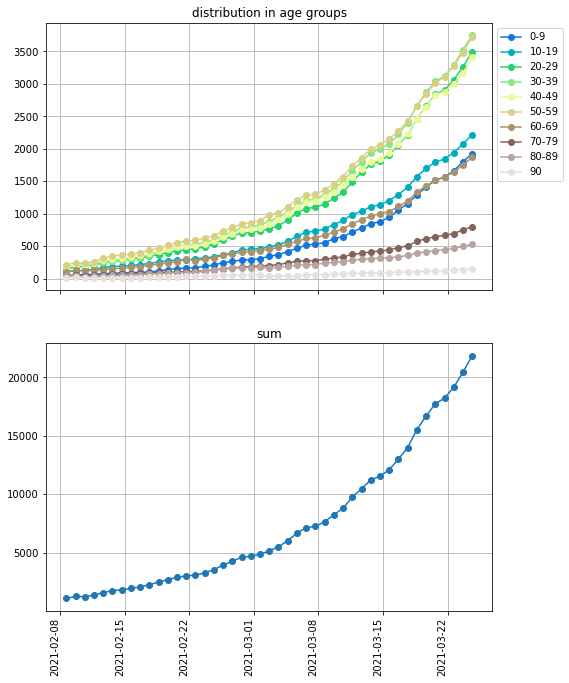

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,12))

cur_cm = cm.terrain
d = np.linspace(0.1, 0.95, len(age_groups))


for cur_ix, cur_age in enumerate(age_groups):
    age_plot = ax[0].plot(data["Timestamp"],
                          data[cur_age],
                          "o-",
                          label=cur_age,
                          color=cur_cm(d[cur_ix])
                          )

ax[0].legend(bbox_to_anchor=(1,1), loc="upper left")
ax[0].grid(True)
ax[0].title.set_text("distribution in age groups")

# plot the sum
ax[1].plot(data["Timestamp"],
          data["sum_agegroups"],
          "o-",)
ax[1].grid(True)
ax[1].title.set_text("sum")
fig.autofmt_xdate(rotation=90)

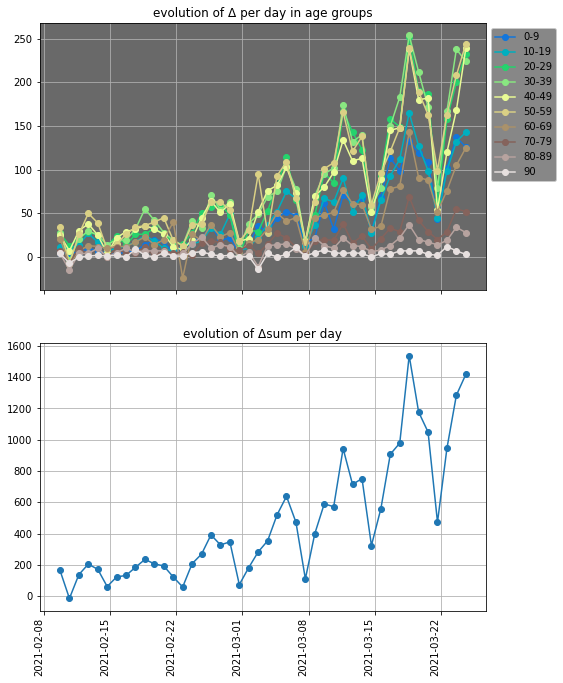

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,12))

cur_cm = cm.terrain
d = np.linspace(0.1, 0.95, len(age_groups))

for cur_ix, cur_age in enumerate(age_groups):
    age_plot = ax[0].plot(Δdata["Timestamp"],
                          Δdata[cur_age],
                          "o-",
                          label=cur_age,
                          color=cur_cm(d[cur_ix])
                          )
ax[0].set_facecolor("dimgrey") 
ax[0].legend(bbox_to_anchor=(1,1), loc="upper left", facecolor="dimgrey")
ax[0].grid(True)
ax[0].title.set_text("evolution of Δ per day in age groups")

# plot the sum
ax[1].plot(Δdata["Timestamp"],
          Δdata["sum_agegroups"],
          "o-",)
ax[1].grid(True)
ax[1].title.set_text("evolution of Δsum per day")
fig.autofmt_xdate(rotation=90)

## Pflegeheime, Schulen, Kitas

'Timestamp', 
'0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90', 
'Faelle', 'nLKs',
'Faelle_Varianten_Typ', 'B117', 'B1351', 
'nAusbrueche_KW53_2020', 'nAusbrueche_KW53_2020_Varinten', 
'n_Ausbrueche_Pflegeheimen', 'nAusbrueche_Pflefeheimen_Varianten', 
'n_Ausbrueche_Schulen', 'n_Ausbrueche_Schulen_Varianten', 
'n_Ausbrueche_Kitas', 'n_Ausbrueche_Kitas_Varianten'],

In [18]:
import importlib
importlib.reload(cvh)

<module 'corona_variants_bw_helper' from '/Users/claushaslauer/Documents/_CodeDev/corona_varianten_bw/corona_variants_bw_helper.py'>

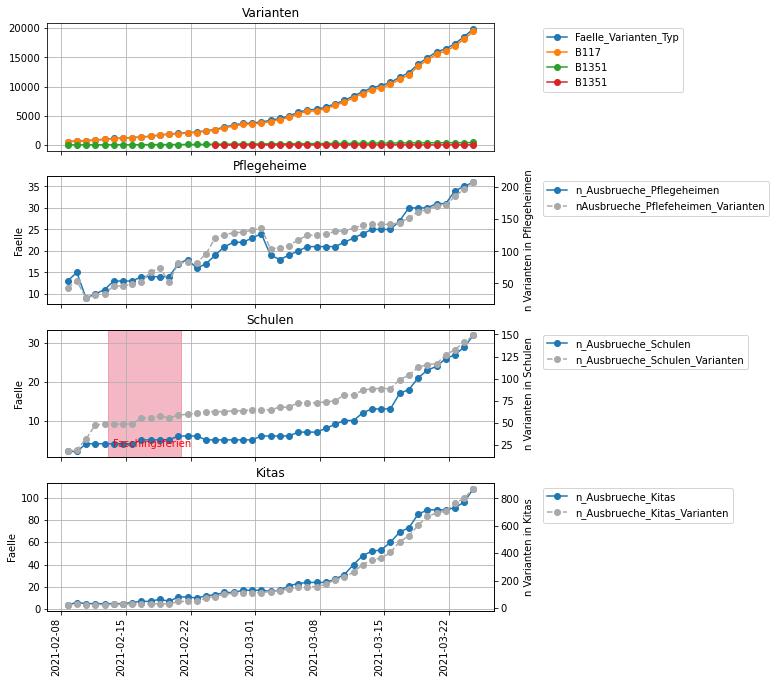

In [19]:
cvh.plot_pflege_schule_kitas(data)

/Users/claushaslauer/Documents/_CodeDev/corona_varianten_bw/corona_variants_bw_helper.py:65: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa0e9045f40> has a label of '_line0' which cannot be automatically added to the legend.
  ax[0].legend(lns, labs, bbox_to_anchor=(1.1,1), loc="upper left")


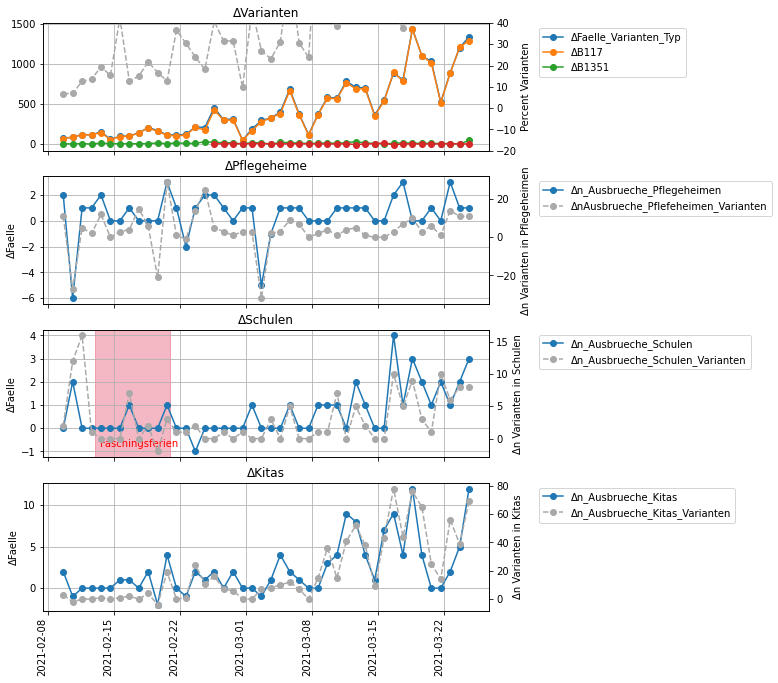

In [20]:
cvh.plot_pflege_schule_kitas(Δdata, flag="Δ")

read from PDF

In [21]:
pdfobject=open('210208_COVID_Tagesbericht_LGA.pdf','rb')

FileNotFoundError: [Errno 2] No such file or directory: '210208_COVID_Tagesbericht_LGA.pdf'

In [ ]:
pdf=pypdf.PdfFileReader(pdfobject)

In [ ]:
pdf.pages

In [ ]:
tables = camelot.read_pdf('210208_COVID_Tagesbericht_LGA.pdf')

In [ ]:
!gs